# <span style="color:red"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione  6 </span>

In questa esercitazione andremo a simulare, tramite metodi Monte Carlo, il modello di Ising monodimensionale per misurare alcune quantità fisiche del sistema, che andranno confrontate coi valori teorici.

### Esercizio 06.1
Consideriamo il modello di Ising monodimensionale; sia dato un sistema di $N$ spin, e assumiamo che le interazioni avvengano tra primi vicini; assumendo le unità $\mu _B = 1$ e $k_B=1$, l'hamiltoniana diventa:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

in cui $\{ s_i \}_{i=1,N}$ sono le variabili di spin che assumono i valori $\{-1,1\}$ e $J>0$ nel modello ferromagnetico. Per questo sistema unidimensionale implementiamo le *condizioni periodiche al contorno* (***PBC***), per cui abbiamo $s_{N+1} = s_{1}$.

Definita l'hamiltoniana del sistema, è data la funzione di partizione:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

con $\lambda_{1,2} = e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, e $\beta=\frac{1}{k_b T} = \frac{1}{T}$. Nota la funzione di partizione, le quantità termodinamiche a cui siamo interessati sono:

- ***Energia interna*** ($h=0$): $$
U(N,T)= \langle H \rangle
= -\frac{\partial \ln Z}{\partial \beta}
$$


- ***Capacità termica*** ($h=0$): $$
C(N,T) = k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right) = \frac{\partial U(N,T)}{\partial T}
$$


- ***Magnetizzazione*** ($h\neq0$): $$M(N,T,h) = \langle \sum_{i=1,N}s_i \rangle_{h=0.02} = k_B T \dfrac{\partial \ln Z}{\partial h}$$


- ***Suscettività magnetica*** ($h=0$): $$
\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0} = \frac{\partial M}{\partial h}$$

Notiamo che l'imposizione $h\neq0$ per la magnetizzazione è necessaria per avere $M\neq0$. Ciò deriva dal fatto che in una dimensione, in assenza di campo esterno, non possiamo avere una transizione di fase ferromagnetica.

Le quantità che abbiamo definito dipendono dalla temperatura e dal numero di spin del sistema. Utilizziamo il codice ``Ising_1D`` per calcolare tramite simulazione Monte Carlo le varie grandezze, che andremo a confrontare con gli andamenti esatti dedotti a partire dalla funzione di partizione.

Per simulare il modello di Ising tramite Monte Carlo, partiamo da una configurazione del sistema di $N=50$ spin preparata in modo casuale. Uno *step* Monte Carlo consiste nel tentare di invertire una volta tutti gli spin del sistema; la probabilità associata a questa operazione è data dal peso di Boltzamnn:

$$p(\{ s_i \}) = \exp(-\beta H)/Z$$

Campioniamo questa distribuzione di probabilità con due diversi algoritmi: ***Metropolis*** e ***Gibbs***. Dopo che ogni spin è stato sottoposto al tentativo di inversione, avremo generato una nuova configurazione del sistema, di cui andremo a misurare le quanità di interesse.

La simulazione utilizza un numero $N_{step}=10^4$ di *step* Monte Carlo, suddivisi in $N_{block}=20$ blocchi per calcolare valori medi ed incertezze statistiche tramite il metodo a blocchi. Fissiamo $J=1$, e calcoliamo la magnetizzazione con $h=0.02$. Prima di comiciare a misurare, equilibriamo la simulazione, lasciando evolvere il sistema attraverso l'algoritmo scelto per un numero sufficente di volte.

Calcoliamo le quantità in funzione della temperatura $T$, nel range $[0.5,2.0]$; estraiamo $20$ punti equispaziati all'interno di questo intervallo, che corrispondono ai valori di temperatura usati nella simulazione (per un totale $20$ simulazioni distinte).

Di seguito riportiamo i risultati ottenuti per entrambi gli algoritmi, confrontati con gli andamenti attesi. I punti nei grafici corrispondono al valore medio dell'ultimo blocco.

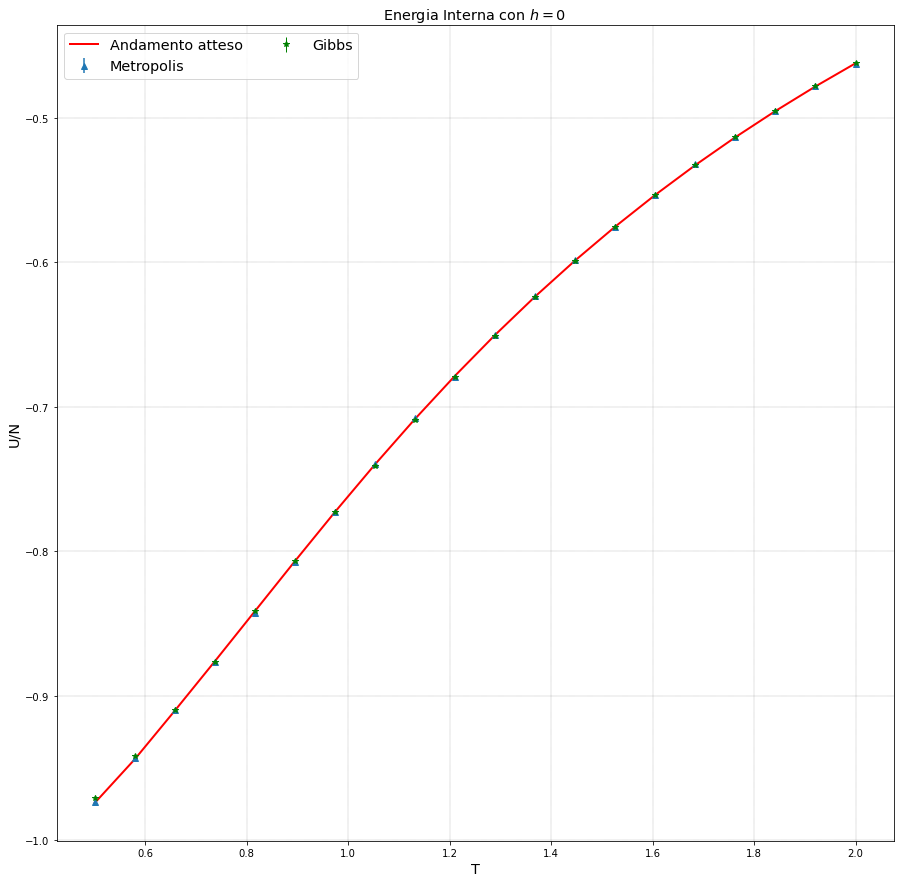

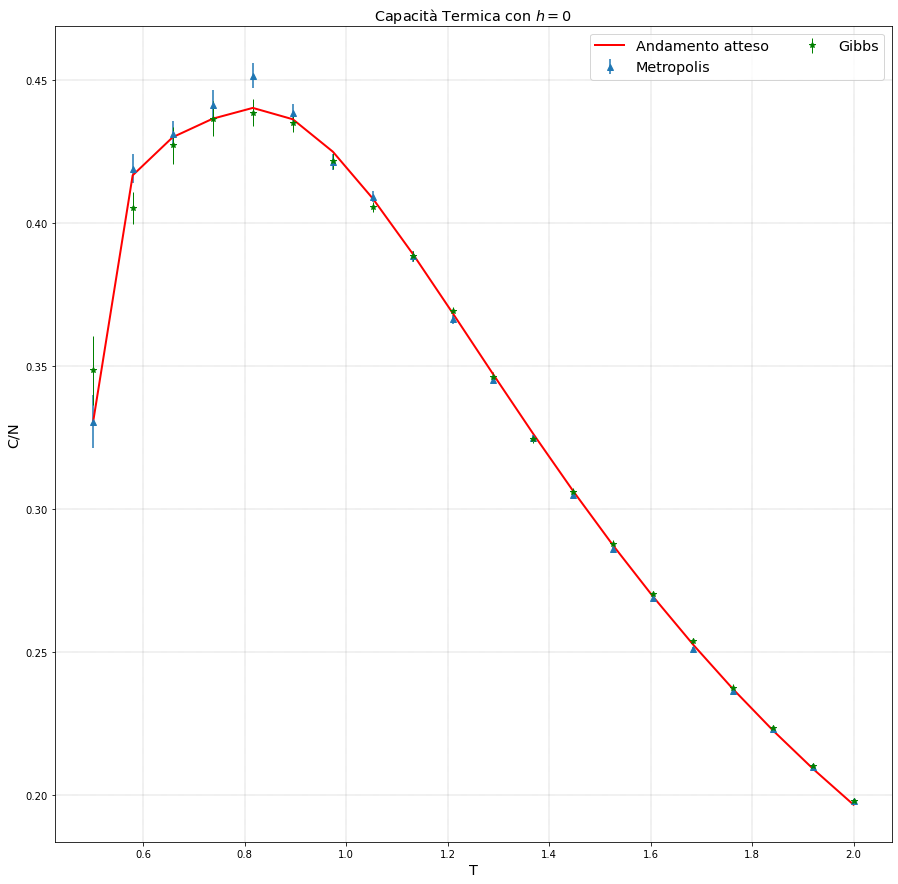

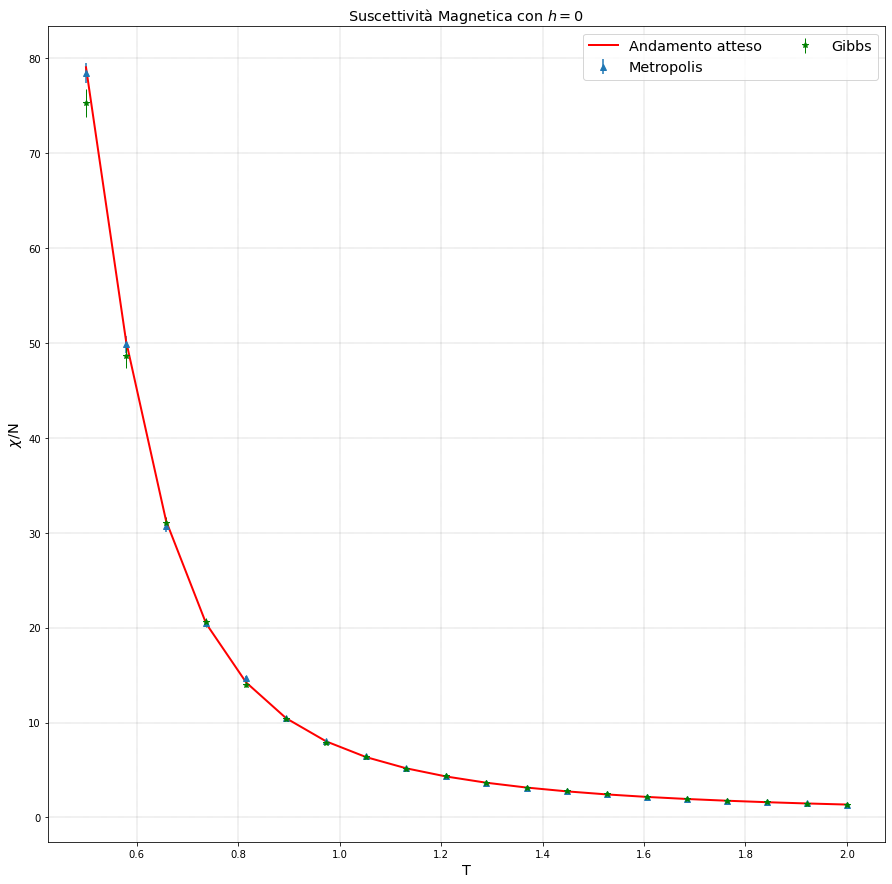

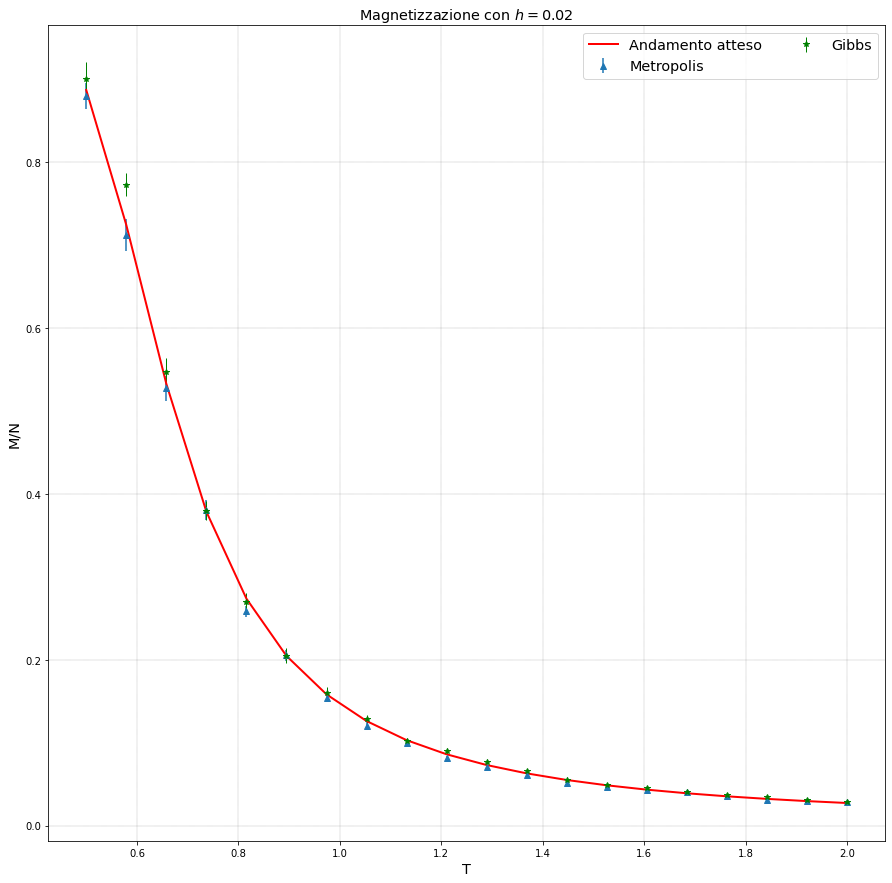

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

fig1, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

points=20
T = np.linspace(0.5,2.0,num=points)

beta = 1/T
J = 1.0
Ns = 50

mean = np.zeros(points)
err = np.zeros(points)

#Usiamo skiprows perchè nei file solo l'ultima riga contiene il valore finale da rappresentare

###### ENERGY  ######


#Expected Energy
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
ax0.plot(T, e, 'r', label="Andamento atteso", linewidth=2)
ax0.set_title('Energia Interna con $h=0$', fontsize="x-large")
ax0.set_xlabel('T', fontsize="x-large")
ax0.set_ylabel('U/N', fontsize="x-large")
ax0.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)


#Metropolis h = 0 Energy
for i in range(points):
    mean[i] = np.loadtxt("metro_h=0/Data/output.ene."+str(i+1), skiprows=19, usecols=2)
    err[i] = np.loadtxt("metro_h=0/Data/output.ene."+str(i+1), skiprows=19, usecols=3)

ax0.errorbar(T, mean, yerr=err, fmt='^', label="Metropolis")

#Gibbs h=0 Energy
for i in range(points):
    mean[i] = np.loadtxt("gibbs_h=0/Data/output.ene."+str(i+1), skiprows=19, usecols=2)
    err[i] = np.loadtxt("gibbs_h=0/Data/output.ene."+str(i+1), skiprows=19, usecols=3)

ax0.errorbar(T, mean, yerr=err, fmt='*', linewidth=1, color="g", label="Gibbs")

ax0.legend( ncol=2, fontsize='x-large')


###### Heat Capacity ######

fig2, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

#Expected Heat Capacity C
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
ax1.plot(T, heat, 'r', label="Andamento atteso", linewidth=2)
ax1.set_title('Capacità Termica con $h=0$', fontsize="x-large")
ax1.set_xlabel('T', fontsize="x-large")
ax1.set_ylabel('C/N', fontsize="x-large")
ax1.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)


#Metropolis h = 0 C
for i in range(points):
    mean[i] = np.loadtxt("metro_h=0/Data/output.heat."+str(i+1), skiprows=19, usecols=2)
    err[i] = np.loadtxt("metro_h=0/Data/output.heat."+str(i+1), skiprows=19, usecols=3)

ax1.errorbar(T, mean, yerr=err, fmt='^', label="Metropolis")

#Gibbs h=0 
for i in range(points):
    mean[i] = np.loadtxt("gibbs_h=0/Data/output.heat."+str(i+1), skiprows=19, usecols=2)
    err[i] = np.loadtxt("gibbs_h=0/Data/output.heat."+str(i+1), skiprows=19, usecols=3)

ax1.errorbar(T, mean, yerr=err, fmt='*', linewidth=1, color="g", label="Gibbs")

ax1.legend(ncol=2, fontsize='x-large')


#### Magnetic Susceptibility ####

fig3, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

#Expected Magnetic Sups. X
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
ax2.plot(T, X, 'r', label="Andamento atteso", linewidth=2)
ax2.set_title('Suscettività Magnetica con $h=0$', fontsize="x-large")
ax2.set_xlabel('T', fontsize="x-large")
ax2.set_ylabel("$\chi$/N", fontsize="x-large")
ax2.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)


#Metropolis h = 0 
for i in range(points):
    mean[i] = np.loadtxt("metro_h=0/Data/output.chi."+str(i+1), skiprows=19, usecols=2)
    err[i] = np.loadtxt("metro_h=0/Data/output.chi."+str(i+1), skiprows=19, usecols=3)

ax2.errorbar(T, mean, yerr=err, fmt='^', label="Metropolis")

#Gibbs h=0
for i in range(points):
    mean[i] = np.loadtxt("gibbs_h=0/Data/output.chi."+str(i+1), skiprows=19, usecols=2)
    err[i] = np.loadtxt("gibbs_h=0/Data/output.chi."+str(i+1), skiprows=19, usecols=3)

ax2.errorbar(T, mean, yerr=err, fmt='*', linewidth=1, color="g", label="Gibbs")

ax2.legend(ncol=2, fontsize='x-large')


#### Magnetization with h = 0.02 ####

fig4, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

#Expected M
h=0.02
b=1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

ax3.plot(T, M, 'r', label="Andamento atteso", linewidth=2)
ax3.set_title('Magnetizzazione con $h=0.02$', fontsize="x-large")
ax3.set_xlabel('T', fontsize="x-large")
ax3.set_ylabel('M/N', fontsize="x-large")
ax3.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)


#Metropolis h = 0.02 
for i in range(points):
    mean[i] = np.loadtxt("metro_h=0.02/Data/output.mag."+str(i+1), skiprows=19, usecols=2)
    err[i] = np.loadtxt("metro_h=0.02/Data/output.mag."+str(i+1), skiprows=19, usecols=3)

ax3.errorbar(T, mean, yerr=err, fmt='^', label="Metropolis")

#Gibbs h=0.02
for i in range(points):
    mean[i] = np.loadtxt("gibbs_h=0.02/Data/output.mag."+str(i+1), skiprows=19, usecols=2)
    err[i] = np.loadtxt("gibbs_h=0.02/Data/output.mag."+str(i+1), skiprows=19, usecols=3)

ax3.errorbar(T, mean, yerr=err, fmt='*', linewidth=1, color="g", label="Gibbs")

ax3.legend(ncol=2, fontsize='x-large')

plt.show()

Vediamo che i punti calcolati attraverso la simulazione riproducono bene l'andamento atteso. L'assenza di barre di errore in alcuni punti deriva da errori troppo piccoli per essere rappresentati. Gli errori maggiori si riscontrano a basse temperature.

Riportiamo di seguito i valori esatti della temperatura.

In [5]:
for i in range(20):
    print(T[i])

0.5
0.5789473684210527
0.6578947368421053
0.7368421052631579
0.8157894736842105
0.8947368421052632
0.9736842105263157
1.0526315789473684
1.131578947368421
1.2105263157894737
1.2894736842105263
1.3684210526315788
1.4473684210526314
1.526315789473684
1.6052631578947367
1.6842105263157894
1.763157894736842
1.8421052631578947
1.9210526315789473
2.0
